In [7]:
import pandas as pd
import sqlalchemy
import os, sys, copy, random, pickle, cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append("../")

%load_ext autoreload
%autoreload 2

from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display
from modules.Interproc import DBInterface, GuiviewState

from modules.AnalysisHelpers import ( 
         exploreImgs, buildImgComparisonData, subprocEval)

from modules.EvalHelpers import EvalTracker, EvalDataset
from modules.ControlEval import EvalFactory
from modules.DataSchemas import ScoreSchema
from modules.EvalHelpers import OutcomeData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [174]:
from modules.EvalHelpers import OutcomeData
od = OutcomeData()

In [175]:
od.displaySummaryStats()

num frames:                  345
obj enums scored/tracked:    0,1 / 0
num scored frames:           19 | 0,9,78...308,324,340
-------


In [176]:
od.displayCondensedTable()[:4]

,input_data0_0,input_data1_0,input_data2_0,input_data3_0,input_obj_exists_0,input_obj_type_0,track_data0_0,track_data1_0,track_data2_0,track_data3_0,track_obj_exists_0,track_obj_type_0
0,107.0,214.0,54.0,52.0,True,circle,101,210,64,64,True,circle
9,194.0,200.0,52.0,53.0,True,circle,183,199,66,66,True,circle
78,385.0,307.0,54.0,51.0,True,circle,382,302,54,54,True,circle
116,342.0,302.0,42.0,39.0,True,circle,337,301,44,44,True,circle


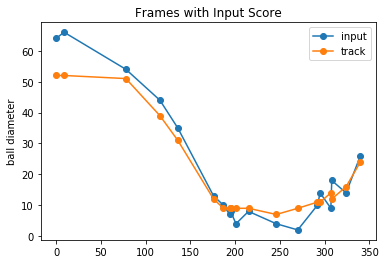

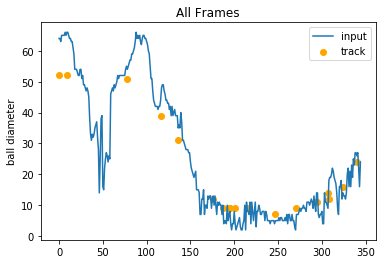

In [224]:
od.displayDiameterPlot()

In [205]:
data = od.displayDiameterPlot(b_ret=True)

In [223]:
# use return data to find frames-of-interest:
#   where's the largest discrepancy?

ipt, trk = data[False]['input'], data[False]['track']

ipt_y, trk_y, x = ipt[1], trk[1], ipt[0]

tracker_diff = [(x, trk - ipt) for ipt, trk, x in zip(ipt_y, trk_y, x)]

tracker_diff.sort(key=lambda elem: abs(elem[1]), reverse=True)
print tracker_diff

num_frames = 3
foiList = [elem[0] for elem in tracker_diff[:num_frames]]
print 'FOI at these frame counters: ', str(foiList)

[(9, 14.0), (0, 12.0), (270, -7.0), (308, 6.0), (116, 5.0), (201, -5.0), (307, -5.0), (136, 4.0), (78, 3.0), (246, -3.0), (295, 3.0), (194, -2.0), (324, -2.0), (340, 2.0), (176, 1.0), (187, 1.0), (195, -1.0), (215, -1.0), (292, -1.0)]
FOI at these frame counters:  [9, 0, 270]


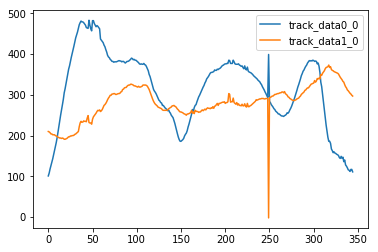

In [225]:
od.displaySeriesPlot(col_names=['track_data0_0', 'track_data1_0'])

In [226]:
df = od.get()

In [227]:
df['track_data0_0'][0]

101